In [27]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [223]:
df = pd.read_csv("../../../Data/COSMIC_2/vw_Incident2_cleaned.csv", encoding='latin-1')
print(len(df))
df.head()

23595


,TimeTaken,AmountinUSD,Complexity,CountryProcessed_asia,CountryProcessed_australia,CountryProcessed_europe,CountryProcessed_northamerica,CountryProcessed_other,CountryProcessed_southamerica,CountrySource_asia,...,sourcesystem_Moritz Jürgensen,sourcesystem_NEMEC,sourcesystem_NMEC,sourcesystem_Web,sourcesystem_clt,sourcesystem_eAgreement,sourcesystem_eAgreement (Phy),sourcesystem_eAgreement(Phy),sourcesystem_email,sourcesystem_web
0,1131077.0,0.149510,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,447459.0,0.150964,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,25474.0,0.150964,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,777526.0,0.149510,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,622610.0,0.149642,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


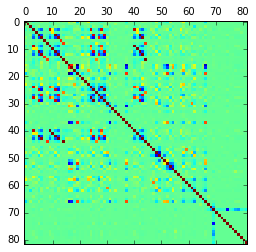

In [10]:
plt.matshow(df.corr())
plt.show()

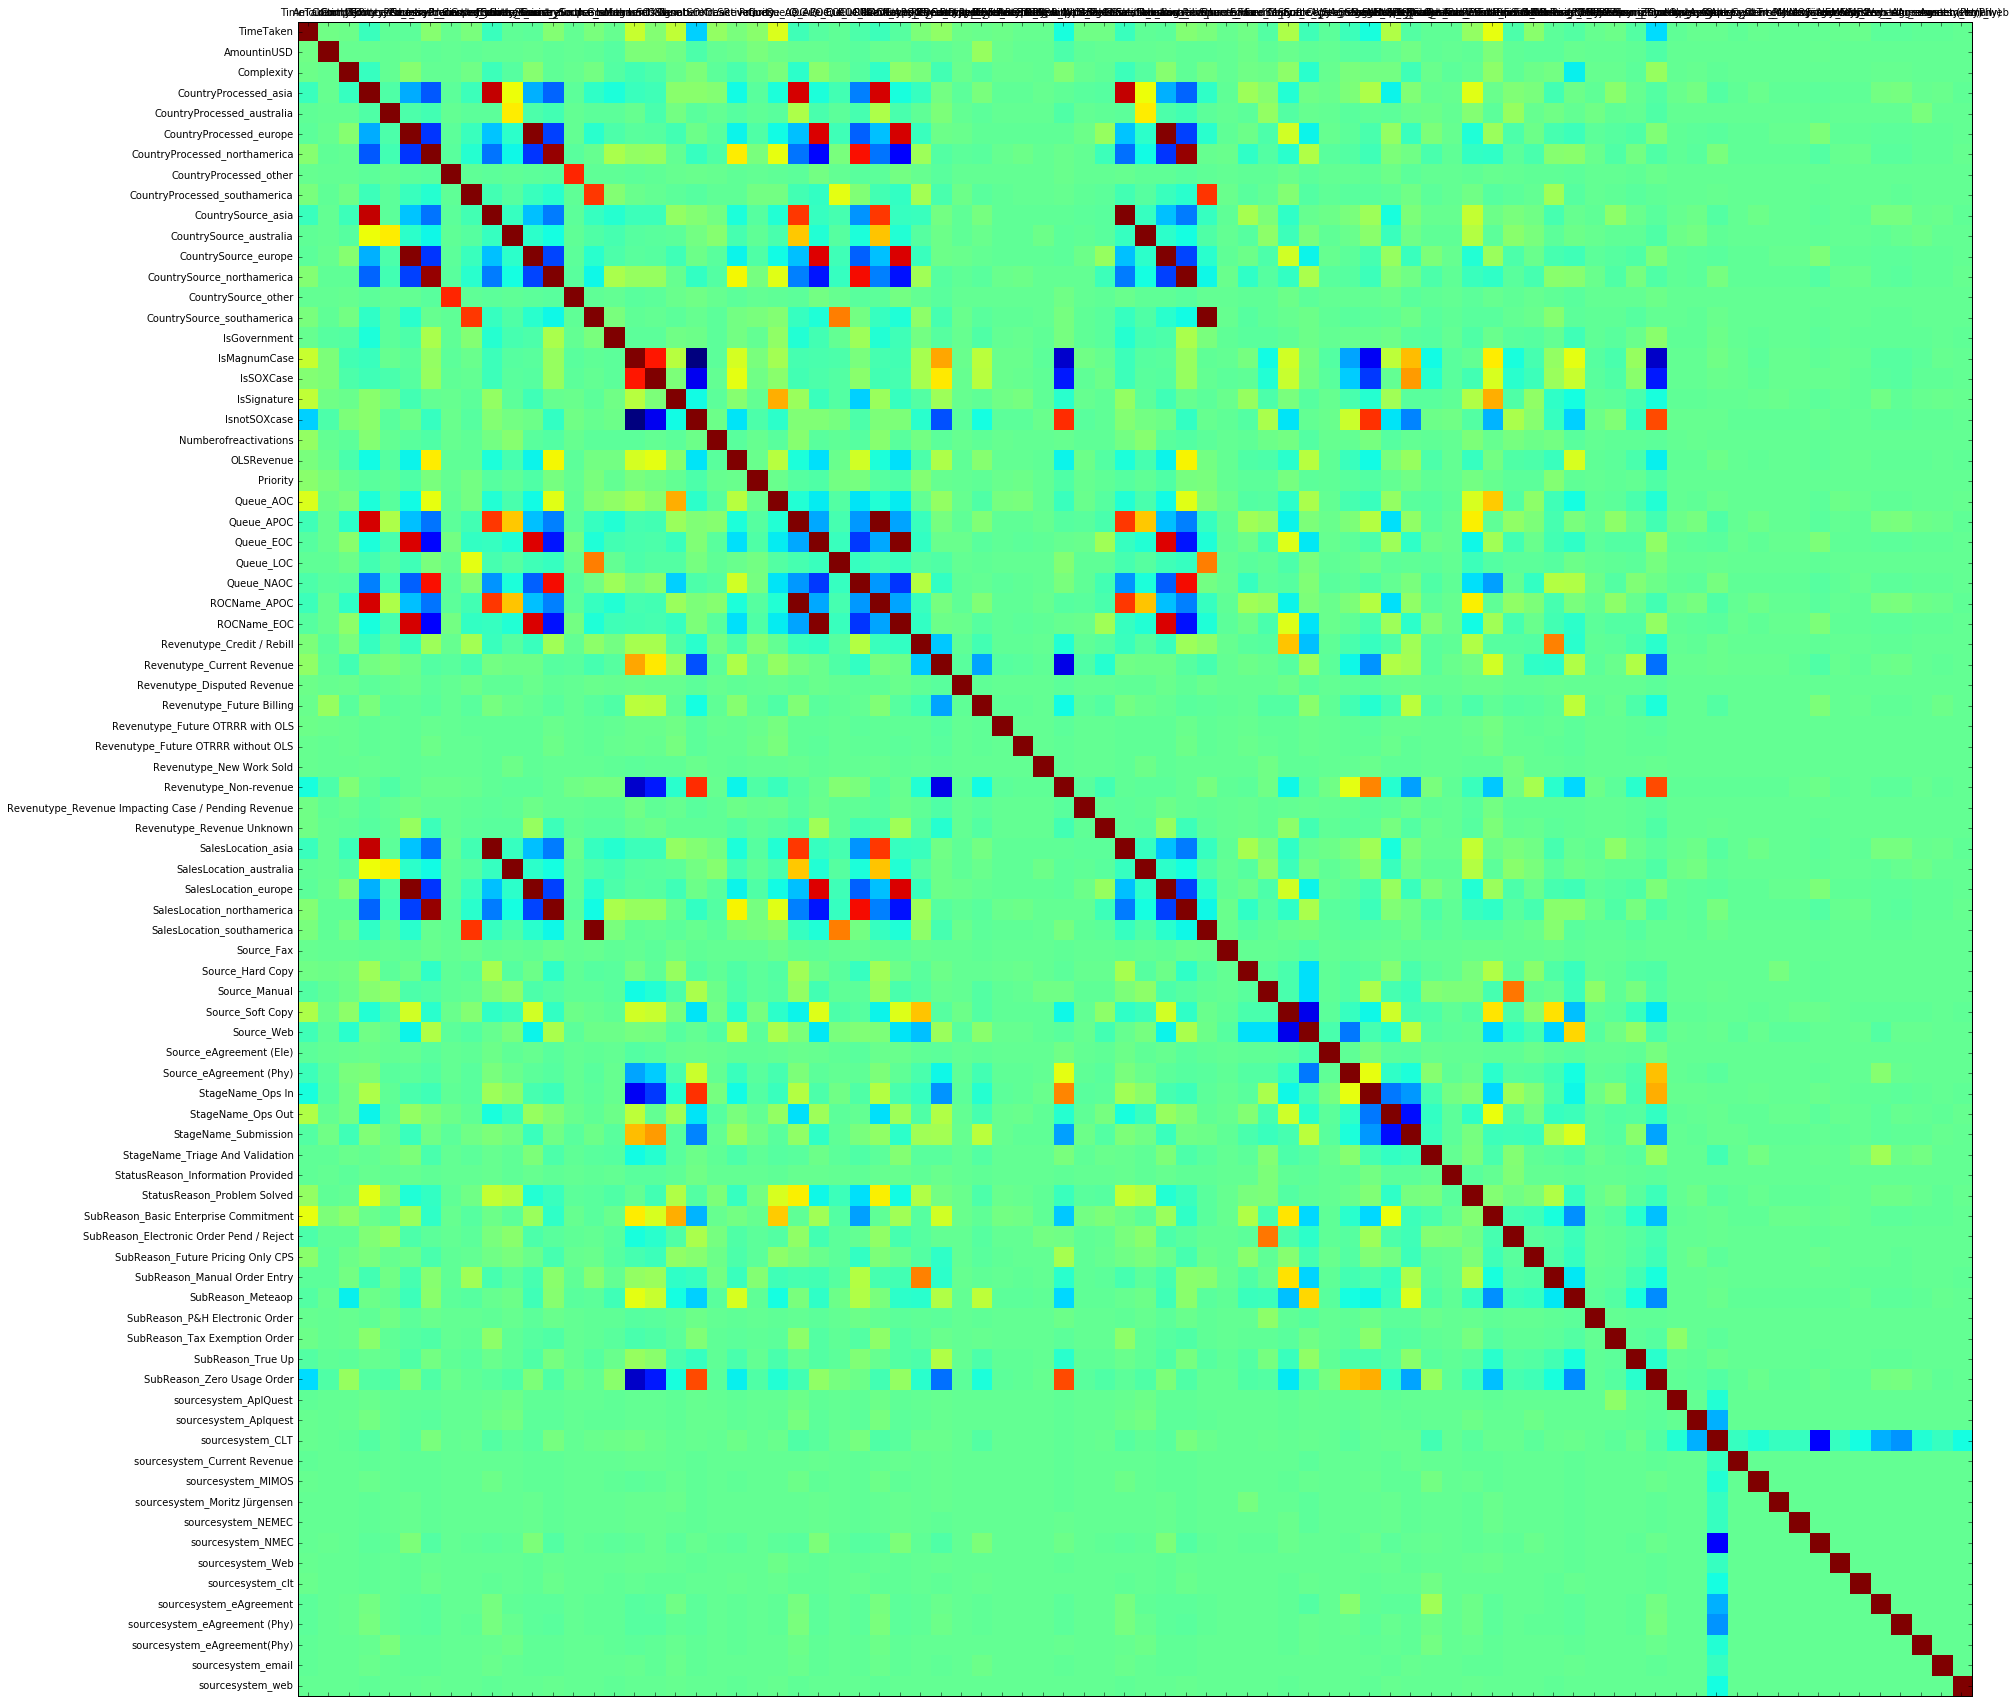

In [15]:
def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);
plot_corr(df, 30)

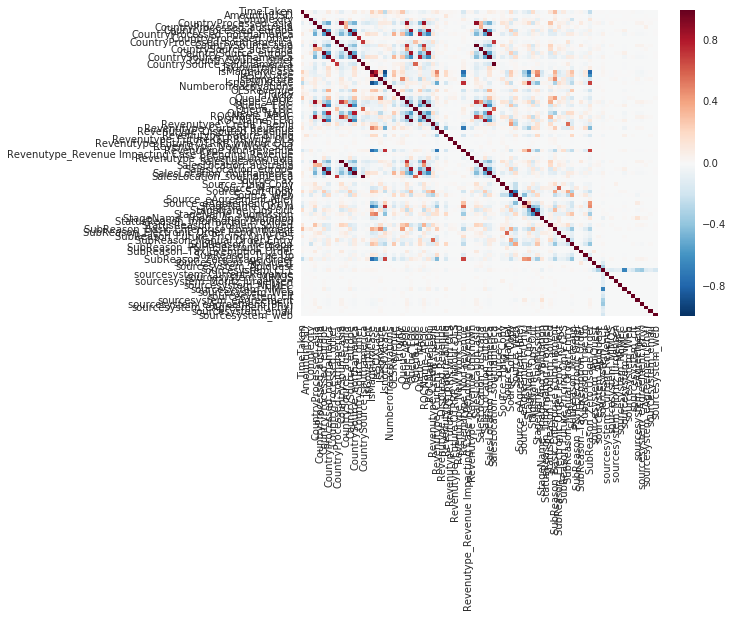

In [19]:
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)
plt.show()

In [101]:
corr = df.corr().abs()

In [102]:
npcorr = np.array(corr)
np.fill_diagonal(npcorr, 0)
npcorrtriu = np.triu(npcorr)
greater9 = np.where(npcorrtriu > .9)
print(greater9)
print(npcorr[greater9])
ind = []
for item in greater9:
    print(item)
    ind.append(item)
print(ind)

(array([ 5,  5,  6,  6,  9, 10, 11, 12, 14, 24, 25], dtype=int64), array([11, 42, 12, 43, 40, 41, 42, 43, 44, 28, 29], dtype=int64))
[ 0.99200923  0.99147095  0.9566083   0.95759694  0.99275867  0.99733581
  0.99860657  0.99878871  0.99272621  0.99777454  0.98772523]
[ 5  5  6  6  9 10 11 12 14 24 25]
[11 42 12 43 40 41 42 43 44 28 29]
[array([ 5,  5,  6,  6,  9, 10, 11, 12, 14, 24, 25], dtype=int64), array([11, 42, 12, 43, 40, 41, 42, 43, 44, 28, 29], dtype=int64)]


In [115]:
greater_9 = corr > 0.9
# print(greater_9)
npcorr[greater_9]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.99200923,  0.99147095,  0.        ,  0.9566083 ,
        0.95759694,  0.        ,  0.        ,  0.        ,  0.99275867,
        0.        ,  0.99733581,  0.99200923,  0.        ,  0.99860657,
        0.9566083 ,  0.        ,  0.99878871,  0.        ,  0.        ,
        0.99272621,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.99777454,  0.        ,  0.98772523,  0.        ,
        0.        ,  0.99777454,  0.        ,  0.98772523,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.99275867,  0.        ,  0.99733581,  0.        ,  0.99147095,
        0.99860657,  0.        ,  0.95759694,  0.99878871,  0.        ,
        0.99272621,  0.        ,  0.        ,  0.        ,  0.  

In [310]:
indices = np.where(corr > 0.9)
col_names_indices = []
col_names = []
for x, y in zip(*indices):
    if x != y and x < y:
        col_names_indices.append((df.columns[x], df.columns[y], x,y, corr[df.columns[x]][df.columns[y]]))
        col_names.append((df.columns[x], df.columns[y]))

col_names_indices.sort(key=lambda x: x[4], reverse=True)

print("Correlation Score, (Column names), [Indices]:")
for i, item in enumerate(col_names_indices):
    print("     %s\t- %s, (\"%s\", \"%s\"), [%s, %s]" % (i+1,item[4], item[0], item[1], item[2], item[3]))

Correlation Score, (Column names), [Indices]:
     1	- 0.998788712019, ("CountrySource_northamerica", "SalesLocation_northamerica"), [12, 43]
     2	- 0.998606574529, ("CountrySource_europe", "SalesLocation_europe"), [11, 42]
     3	- 0.997774537515, ("Queue_APOC", "ROCName_APOC"), [24, 28]
     4	- 0.997335805934, ("CountrySource_australia", "SalesLocation_australia"), [10, 41]
     5	- 0.99275866924, ("CountrySource_asia", "SalesLocation_asia"), [9, 40]
     6	- 0.992726214841, ("CountrySource_southamerica", "SalesLocation_southamerica"), [14, 44]
     7	- 0.992009232042, ("CountryProcessed_europe", "CountrySource_europe"), [5, 11]
     8	- 0.991470951559, ("CountryProcessed_europe", "SalesLocation_europe"), [5, 42]
     9	- 0.987725233795, ("Queue_EOC", "ROCName_EOC"), [25, 29]
     10	- 0.957596942986, ("CountryProcessed_northamerica", "SalesLocation_northamerica"), [6, 43]
     11	- 0.956608303008, ("CountryProcessed_northamerica", "CountrySource_northamerica"), [6, 12]


In [309]:
count_dict = {}
for name_set in col_names_indices:
    if name_set[0] not in count_dict:
        count_dict[name_set[0]] = 1
    else:
        count_dict[name_set[0]] +=1
   
    if name_set[1] not in count_dict:
        count_dict[name_set[1]] = 1
    else:
        count_dict[name_set[1]] +=1
print(count_dict)
print("Columns which appear more than once above the threshold")
cols_to_delete = []
for item in count_dict:
    if count_dict[item] > 1:
        print(item, "=", count_dict[item])

for name_set in col_names_indices:
    if name_set[0] not in cols_to_delete and name_set[1] not in cols_to_delete:
        if count_dict[name_set[0]] > count_dict[name_set[0]]:
            cols_to_delete.append(name_set[0])
        else:
            cols_to_delete.append(name_set[1])

print("\nColumns to be deleted:")
df_cleaned = df.copy()
for item in cols_to_delete:
    print(" -",item)
#     del df_cleaned[item]

{'Queue_APOC': 1, 'Queue_EOC': 1, 'SalesLocation_australia': 1, 'SalesLocation_northamerica': 2, 'CountrySource_europe': 2, 'SalesLocation_asia': 1, 'CountryProcessed_europe': 2, 'ROCName_EOC': 1, 'CountrySource_asia': 1, 'ROCName_APOC': 1, 'CountryProcessed_northamerica': 2, 'CountrySource_southamerica': 1, 'SalesLocation_europe': 2, 'CountrySource_australia': 1, 'CountrySource_northamerica': 2, 'SalesLocation_southamerica': 1}
Columns which appear more than once above the threshold
SalesLocation_northamerica = 2
CountrySource_europe = 2
CountryProcessed_europe = 2
CountryProcessed_northamerica = 2
SalesLocation_europe = 2
CountrySource_northamerica = 2

Columns to be deleted:
 - SalesLocation_northamerica
 - SalesLocation_europe
 - ROCName_APOC
 - SalesLocation_australia
 - SalesLocation_asia
 - SalesLocation_southamerica
 - CountrySource_europe
 - ROCName_EOC
 - CountrySource_northamerica


In [307]:
# print(col_names[0])
# print(cols_to_delete[0])
for name_set in col_names:
    for del_col in cols_to_delete:
        if del_col in name_set:
            print(name_set, del_col)

('CountryProcessed_europe', 'CountrySource_europe') CountrySource_europe
('CountryProcessed_europe', 'SalesLocation_europe') SalesLocation_europe
('CountryProcessed_northamerica', 'CountrySource_northamerica') CountrySource_northamerica
('CountryProcessed_northamerica', 'SalesLocation_northamerica') SalesLocation_northamerica
('CountrySource_asia', 'SalesLocation_asia') SalesLocation_asia
('CountrySource_australia', 'SalesLocation_australia') SalesLocation_australia
('CountrySource_europe', 'SalesLocation_europe') SalesLocation_europe
('CountrySource_europe', 'SalesLocation_europe') CountrySource_europe
('CountrySource_northamerica', 'SalesLocation_northamerica') SalesLocation_northamerica
('CountrySource_northamerica', 'SalesLocation_northamerica') CountrySource_northamerica
('CountrySource_southamerica', 'SalesLocation_southamerica') SalesLocation_southamerica
('Queue_APOC', 'ROCName_APOC') ROCName_APOC
('Queue_EOC', 'ROCName_EOC') ROCName_EOC


In [327]:
def cols_with_corr_above_threshold(df, threshold):
    corr = df.corr().abs()
    indices = np.where(corr > 0.9)
    col_names_indices = []
    for x, y in zip(*indices):
        if x != y and x < y:
            col_names_indices.append((df.columns[x], df.columns[y], x,y, corr[df.columns[x]][df.columns[y]]))
#             col_names.append((df.columns[x], df.columns[y]))

    col_names_indices.sort(key=lambda x: x[4], reverse=True)
    return col_names_indices

def print_corr_names_indices(col_names_indices):
    print("Correlation Score, (Column names), [Indices]:")
    for i, item in enumerate(col_names_indices):
        print("     %s\t- %s, (\"%s\", \"%s\"), [%s, %s]" % (i+1,item[4], item[0], item[1], item[2], item[3]))

def count_corr_cols_which_appear_multiple_times(col_names_indices):
    count_dict = {}
    for name_set in col_names_indices:
        if name_set[0] not in count_dict:
            count_dict[name_set[0]] = 1
        else:
            count_dict[name_set[0]] +=1

        if name_set[1] not in count_dict:
            count_dict[name_set[1]] = 1
        else:
            count_dict[name_set[1]] +=1
    return count_dict

def print_cols_which_appear_multiple_times(count_dict):
    print("\nColumns which appear more than once above the threshold:")
    for item in count_dict:
        if count_dict[item] > 1:
            print(" -",item, "=", count_dict[item])

def find_corr_cols_to_delete(col_names_indices):
    cols_to_delete = []
    for name_set in col_names_indices:
        if name_set[0] not in cols_to_delete and name_set[1] not in cols_to_delete:
            if count_dict[name_set[0]] > count_dict[name_set[0]]:
                cols_to_delete.append(name_set[0])
            else:
                cols_to_delete.append(name_set[1])
    return cols_to_delete

def print_cols_to_delete(cols_to_delete):
    print("\nColumns to be deleted:")
    for item in cols_to_delete:
        print(" -",item)
        
def delete_corr_cols(df, cols_to_delete):
    df_cleaned = df.copy()
    for item in cols_to_delete:
        del df_cleaned[item]
    return df_cleaned

def find_and_delete_corr(df, threshold):
    col_names_indices = cols_with_corr_above_threshold(df, 0.9)
    count_dict = count_corr_cols_which_appear_multiple_times(col_names_indices)
    cols_to_delete = find_corr_cols_to_delete(col_names_indices)
    df_cleaned = delete_corr_cols(df, cols_to_delete)
    return df_cleaned

df = find_and_delete_corr(df, 0.9)
print(len(df.columns))

if __name__ =="__main__":
    col_names_indices = cols_with_corr_above_threshold(df, 0.9)
    print_corr_names_indices(col_names_indices)

    count_dict = count_corr_cols_which_appear_multiple_times(col_names_indices)
    print_cols_which_appear_multiple_times(count_dict)

    cols_to_delete = find_corr_cols_to_delete(col_names_indices)
    print_cols_to_delete(cols_to_delete)

    df_cleaned = delete_corr_cols(df, cols_to_delete)

73
Correlation Score, (Column names), [Indices]:

Columns which appear more than once above the threshold:

Columns to be deleted:
